In [1]:
#Loading some libraries
library(gridExtra)
library(ggthemes)
library(tidyverse)

#This function allows to choose the dimensions of plots in the notebook
fig <- function(width, heigth){
    options(repr.plot.width = width, repr.plot.height = heigth)
}

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()



## Exercise 1

Here the dataframe is created using the features

In [2]:
Lake_name <- c('Loch Ness', 'Loch Lomond', 'Loch Morar', 'Loch Tay', 'Loch Awe', 'Loch Maree', 'Loch Ericht', 'Loch Lochy', 'Loch Rannoch',
               'Loch Shiel','Loch Katrine', 'Loch Arkaig', 'Loch Shin')
Volume <- c(7.45,2.6,2.3,1.6,1.2,1.09,1.08, 1.07,0.97,0.79,0.77,0.75,0.35)
Area <- c(56,71,27,26.4,39,28.6,18.6,16,19,19.5,12.4,16,22.5)
Length <- c(39,36,18.8,23,41,20,23,16,15.7,28,12.9,19.3,27.8)
Max_depth <- c(230,190,310,150,94,114, 156,162,134,128,151,109,49)
Mean_depth <- c(132,37,87,60.6,32,38,57.6,70,51,40,43.4,46.5,15.5)
scottish.lakes <- data.frame(Lake_name, Volume, Area, Length, Max_depth, Mean_depth)

In [3]:
scottish.lakes

Lake_name,Volume,Area,Length,Max_depth,Mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


In [4]:
MaxArea <- max(scottish.lakes$Area)
MaxVolume <- max(scottish.lakes$Volume)
MinArea <- min(scottish.lakes$Area)
MinVolume <- min(scottish.lakes$Volume)

MaxArea_i <- which.max(scottish.lakes$Area)
MaxVolume_i <- which.max(scottish.lakes$Volume)
MinArea_i <- which.min(scottish.lakes$Area)
MinVolume_i <- which.min(scottish.lakes$Volume)

cat('The lake with the max area is', scottish.lakes$Lake_name[MaxArea_i], 'with area', MaxArea, 'km^2')
cat('\nThe lake with the max volume is', scottish.lakes$Lake_name[MaxVolume_i], 'with volume', MaxVolume, 'km^3')
cat('\nThe lake with the min area is', scottish.lakes$Lake_name[MinArea_i], 'with area', MinArea, 'km^2')
cat('\nThe lake with the min volume is', scottish.lakes$Lake_name[MinVolume_i], 'with volume', MinVolume, 'km^3')

The lake with the max area is Loch Lomond with area 71 km^2
The lake with the max volume is Loch Ness with volume 7.45 km^3
The lake with the min area is Loch Katrine with area 12.4 km^2
The lake with the min volume is Loch Shin with volume 0.35 km^3

In the next cell lakes are ordered by area

In [5]:
orderlakes <- scottish.lakes[order(Area, decreasing = TRUE),]
head(orderlakes,3)

,Lake_name,Volume,Area,Length,Max_depth,Mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71,36,190,37
1,Loch Ness,7.45,56,39,230,132
5,Loch Awe,1.20,39,41,94,32


In [6]:
cat('The lakes with the two largest areas are:', orderlakes$Lake_name[1], 'and', orderlakes$Lake_name[2])

The lakes with the two largest areas are: Loch Lomond and Loch Ness

In [7]:
TotArea <- sum(scottish.lakes$Area)
cat('Total area covered by lakes:', TotArea,  'km^2')

Total area covered by lakes: 372 km^2

## Exercise 2

Data loading. __ATTENTION:__ for this Exercise and the next the input data were downloaded and put in a folder named _/DATA_.

In [8]:
oil.data <- read.table('DATA/crude-oil-prices.csv', header = T, sep = ',')
head(oil.data, 10)

,Entity,Code,Year,OilPrice
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74
7,World,OWID_WRL,1867,2.41
8,World,OWID_WRL,1868,3.63
9,World,OWID_WRL,1869,3.64


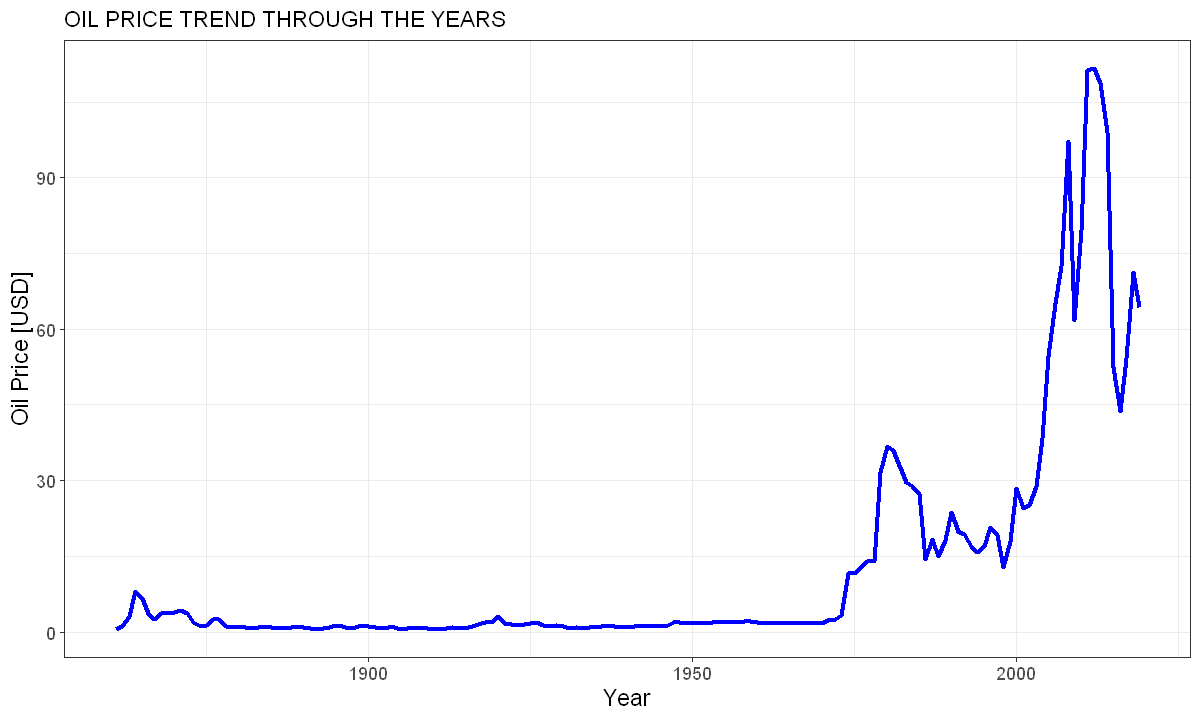

In [9]:
fig(10, 6)
p <- oil.data %>% ggplot(aes(Year, OilPrice)) 
p + geom_line(col = 'blue', size = 1.2) + 
xlab('Year') + ylab('Oil Price [USD]') + ggtitle('OIL PRICE TREND THROUGH THE YEARS') + 
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) 

In [10]:
HigherPrice <- max(oil.data$OilPrice)
HigherPrice_i <- which.max(oil.data$OilPrice)
cat('The higher price is', HigherPrice, 'in the year', oil.data$Year[HigherPrice_i])

The higher price is 111.6697 in the year 2012

In [11]:
derivative <- diff(oil.data$OilPrice)
year <- oil.data$Year[-length(oil.data$Year)] + (oil.data$Year[2]-oil.data$Year[1])/2

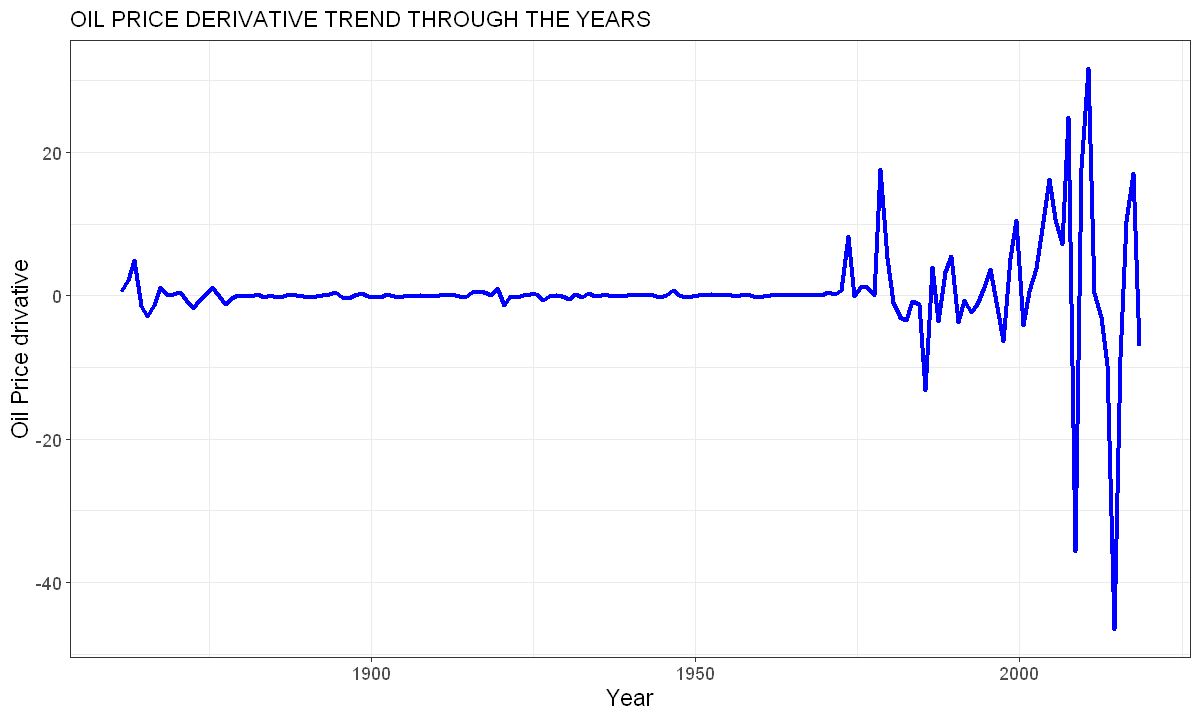

In [12]:
fig(10, 6)
p <- ggplot() 
p + geom_line(aes(year, derivative), col = 'blue', size = 1.2) +
xlab('Year') + ylab('Oil Price drivative') + ggtitle('OIL PRICE DERIVATIVE TREND THROUGH THE YEARS') + 
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) 

## Exercise 3

In [13]:
coal.data <- tibble(read.csv('DATA/coal-production-by-country.csv'))
names(coal.data) <- c('Country', 'Code', 'Year', 'Coal')
head(coal.data, 10)

Country,Code,Year,Coal
<chr>,<chr>,<int>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


The dataset contains a lot of entries relative to aggregates regions (World, Europe, Africa, Asia, ecc.) that are distinguishable from the countries thanks to the absence of the specific _Code_ or by the value _OWID_WORLD_. These entries are filtered out from the dataset to mantain only the information about countries

In [14]:
coal.data %>% filter((Code %in% (c('', 'OWID_WRL')))) %>% group_by(Country) %>% count()

Country,n
<chr>,<int>
Africa,104
Asia and Oceania,117
Asia Pacific,39
Burma,117
Central and South America,117
CIS,39
EU-28,117
Eurasia,117
Europe,104


Note than some countries (Burma, Macau and Ivory Coast) must be kept although they do not have a specific _Code_. So some ad hoc _Code_ will be assigned to them 

In [15]:
coal.data[coal.data$Country == 'Burma',]$Code <- 'brm'
coal.data[coal.data$Country == 'Ivory Coast',]$Code <- 'IvC'
coal.data[coal.data$Country == 'Macau',]$Code <- 'Mac'

In [16]:
coal.data <- coal.data %>% filter(!(Code %in% (c('', 'OWID_WRL'))))

In [17]:
Ncountry <- length(table(coal.data$Country))
cat('# of country in the dataset:', Ncountry)

# of country in the dataset: 178

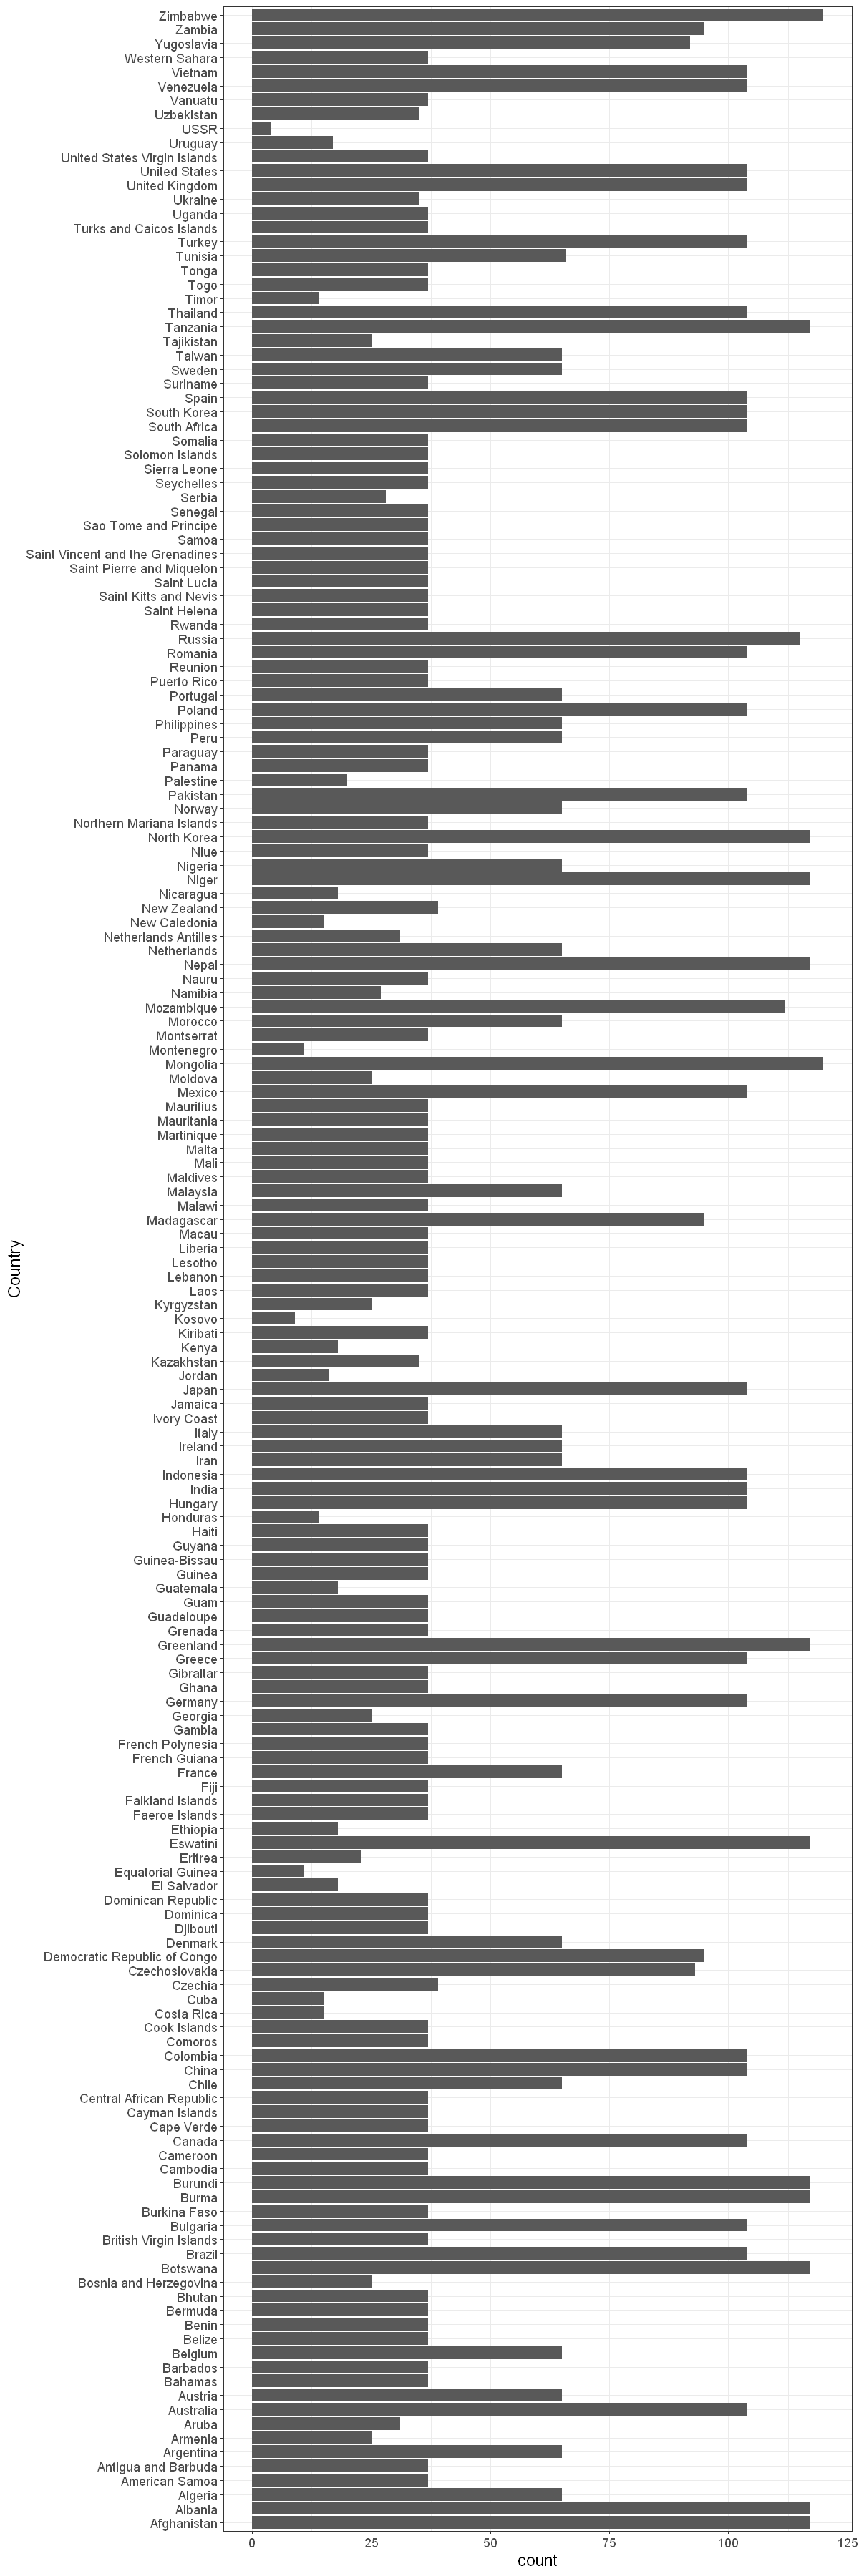

In [18]:
fig(10, 30)
p <- ggplot(coal.data %>% group_by(Country) %>% count() , aes(Country)) + geom_bar(aes(weight = n))
p + coord_flip() +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) 

In [19]:
new.coal <- coal.data[coal.data$Year >= 1970,]

The new dataset (after 1970) is reordered to show the first five major producer of coal

In [20]:
head(new.coal %>% group_by(Country) %>% summarise(Coal = sum(Coal)) %>% arrange(desc(Coal)), 5)

Country,Coal
<chr>,<dbl>
China,459564.65
United States,226068.84
Russia,101908.49
Australia,83077.07
India,77043.45


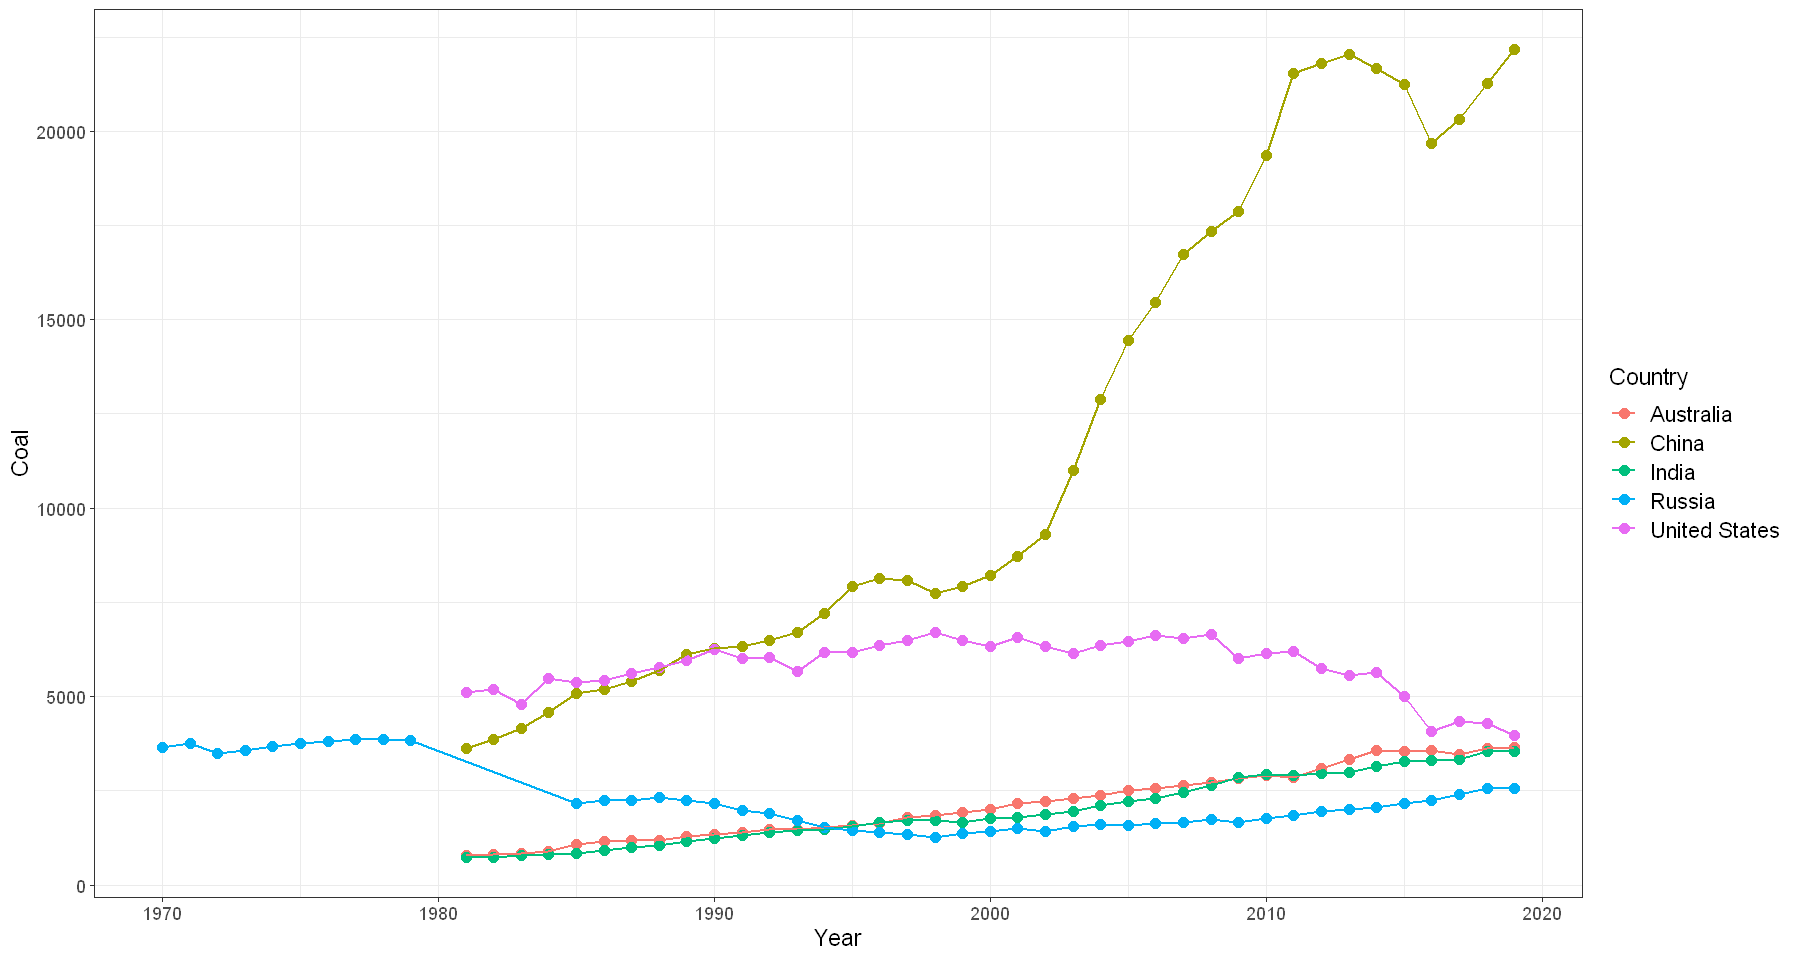

In [21]:
fig(15, 8)
p <- new.coal %>% filter(Country %in% c('China', 'United States', 'Russia', 'Australia', 'India')) %>% ggplot(aes(Year, Coal, group = Country))
p + geom_point(aes(col = Country), size = 2.7) + geom_line(aes(col = Country), size = 0.7) +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) +
theme(legend.title = element_text(size = 14), legend.text = element_text(size = 13)) 

In order to plot the cumulative production of coal in the world, the dataset is grouped by Year and all the entries of all contries are summed.

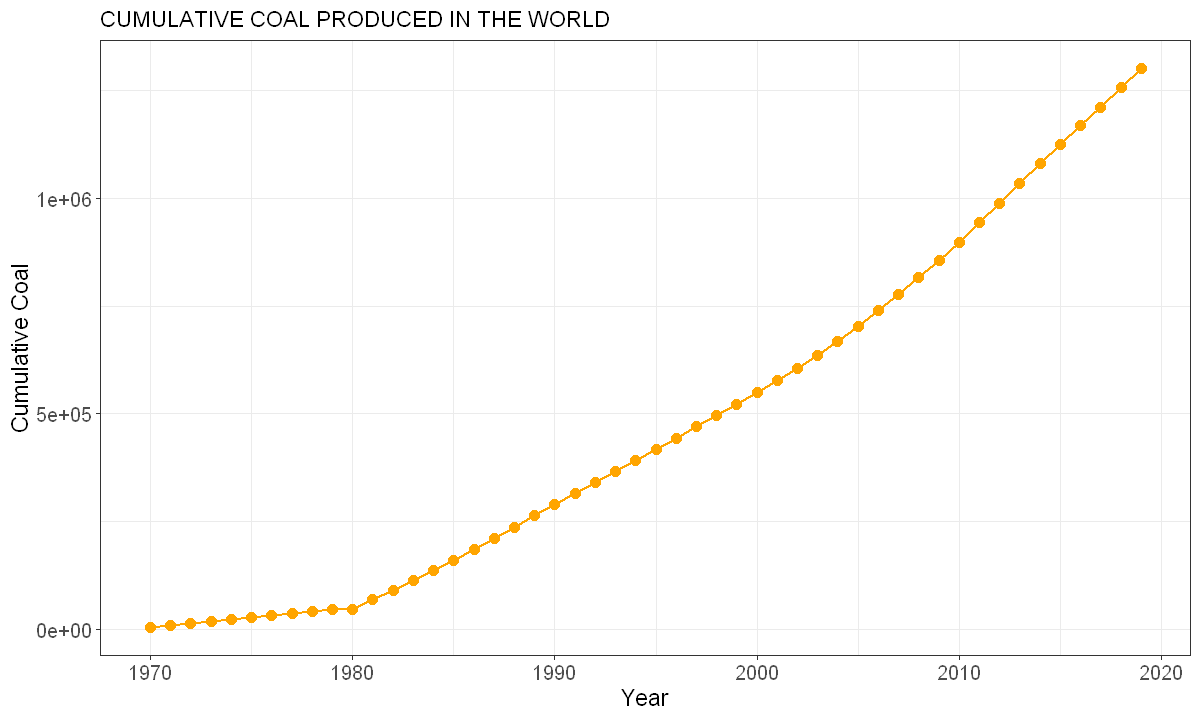

In [22]:
fig(10, 6)
p <- new.coal %>% group_by(Year) %>% summarise(Coal = sum(Coal)) %>% ggplot(aes(Year, cumsum(Coal)))
p + geom_point(size = 2.7, col = 'orange') + geom_line(size = 0.7, col = 'orange') + ylab('Cumulative Coal') + 
ggtitle('CUMULATIVE COAL PRODUCED IN THE WORLD') + 
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) 

## Exercise 4

For this exercise data are taken directly from their _url_ 

In [23]:
url <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/"
fname <- "vaccinations-by-manufacturer.csv"
target <- paste (url, fname , sep ="")
message("target:", target )
tmp_file <- tempfile("vaccinations-by-manufacturer.csv", "~/MasterCourse/Advance_Statistics/Ex_Lab/DATA/")
tmp <- curl::curl_download(target, destfile=tmp_file)
vaccine.data <- read_csv(tmp_file)
head(vaccine.data, 6)

target:https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Chile,2020-12-24,Pfizer/BioNTech,420
Chile,2020-12-25,Pfizer/BioNTech,5198
Chile,2020-12-26,Pfizer/BioNTech,8338
Chile,2020-12-27,Pfizer/BioNTech,8649
Chile,2020-12-28,Pfizer/BioNTech,8649
Chile,2020-12-29,Pfizer/BioNTech,8649


Data from Italy are selected. Here we plot the vaccinations per day and the total vaccinations for each pharmaceutical company 

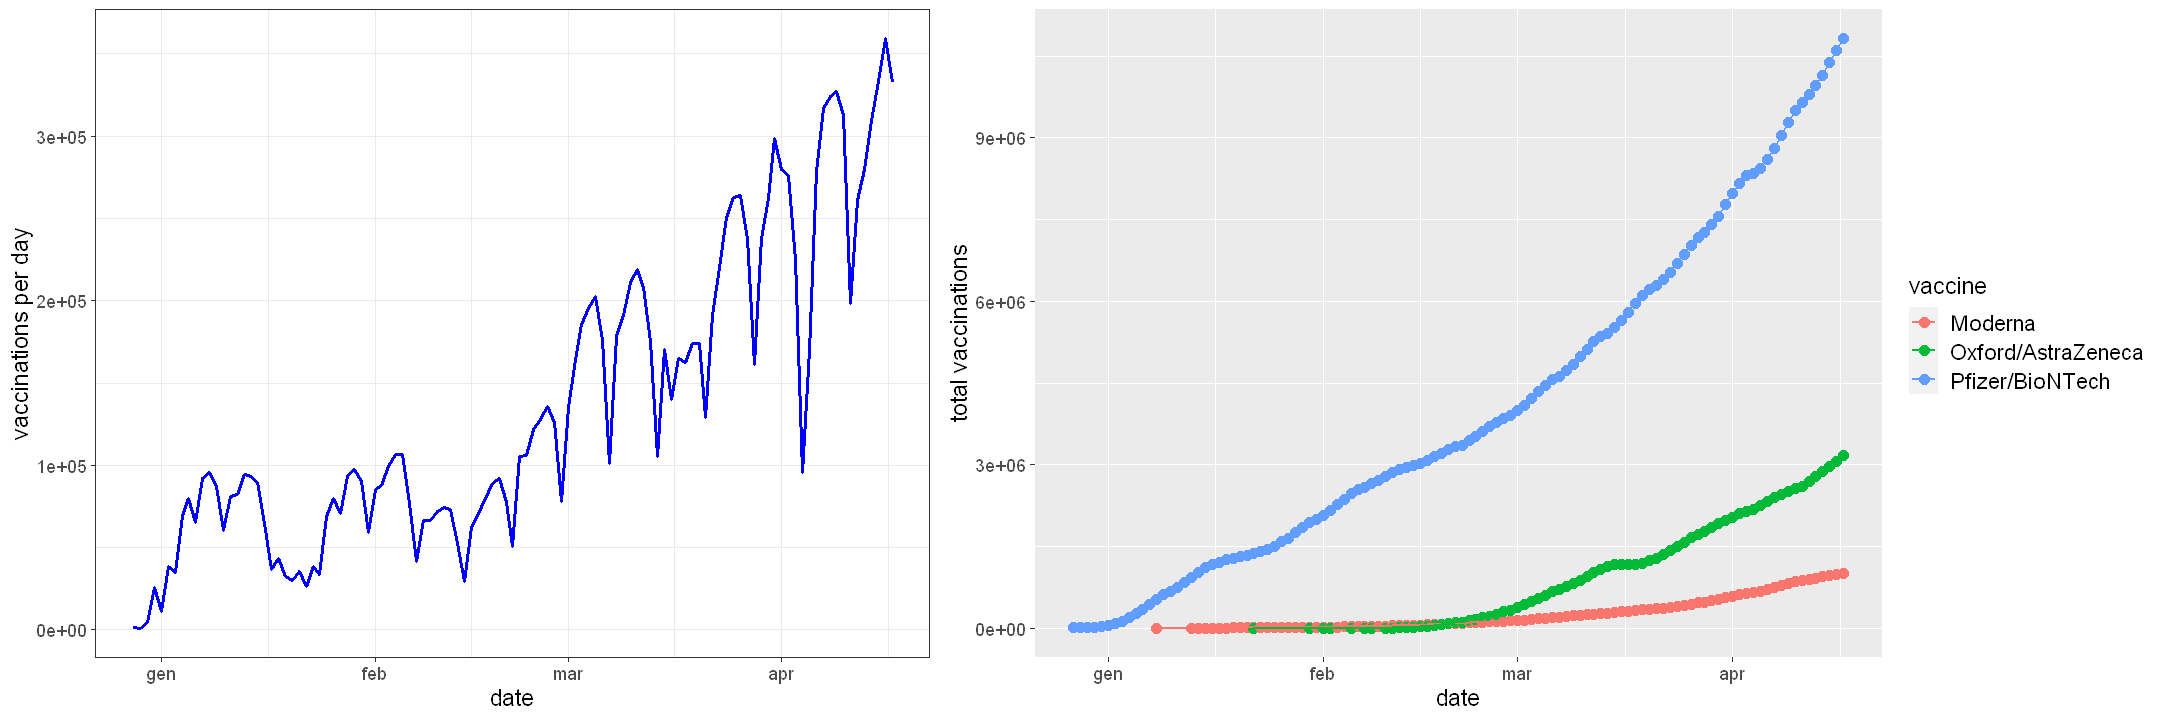

In [24]:
vaccine.ita <- vaccine.data %>% filter(location == 'Italy')

fig(18, 6)
p2 <- vaccine.ita %>% ggplot(aes(date, total_vaccinations, group = vaccine))
p2 <- p2 + geom_point(aes(col = vaccine), size = 2.7) + geom_line(aes(col =vaccine), size = 0.7) + 
ylab('total vaccinations') +
theme_gray() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) +
theme(legend.title = element_text(size = 14), legend.text = element_text(size = 13))

p1 <- vaccine.ita %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations)) %>% 
mutate(vacc_per_day = c(total_vaccinations[1],diff(total_vaccinations))) %>% slice(2:n()) %>% ggplot(aes(date, vacc_per_day))
p1 <- p1 + geom_line(size = 0.9, col = 'blue') + ylab('vaccinations per day') +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) 

grid.arrange(p1, p2, nrow = 1, widths = c(1, 1.3))

The operation is repeated with data from Germany and USA

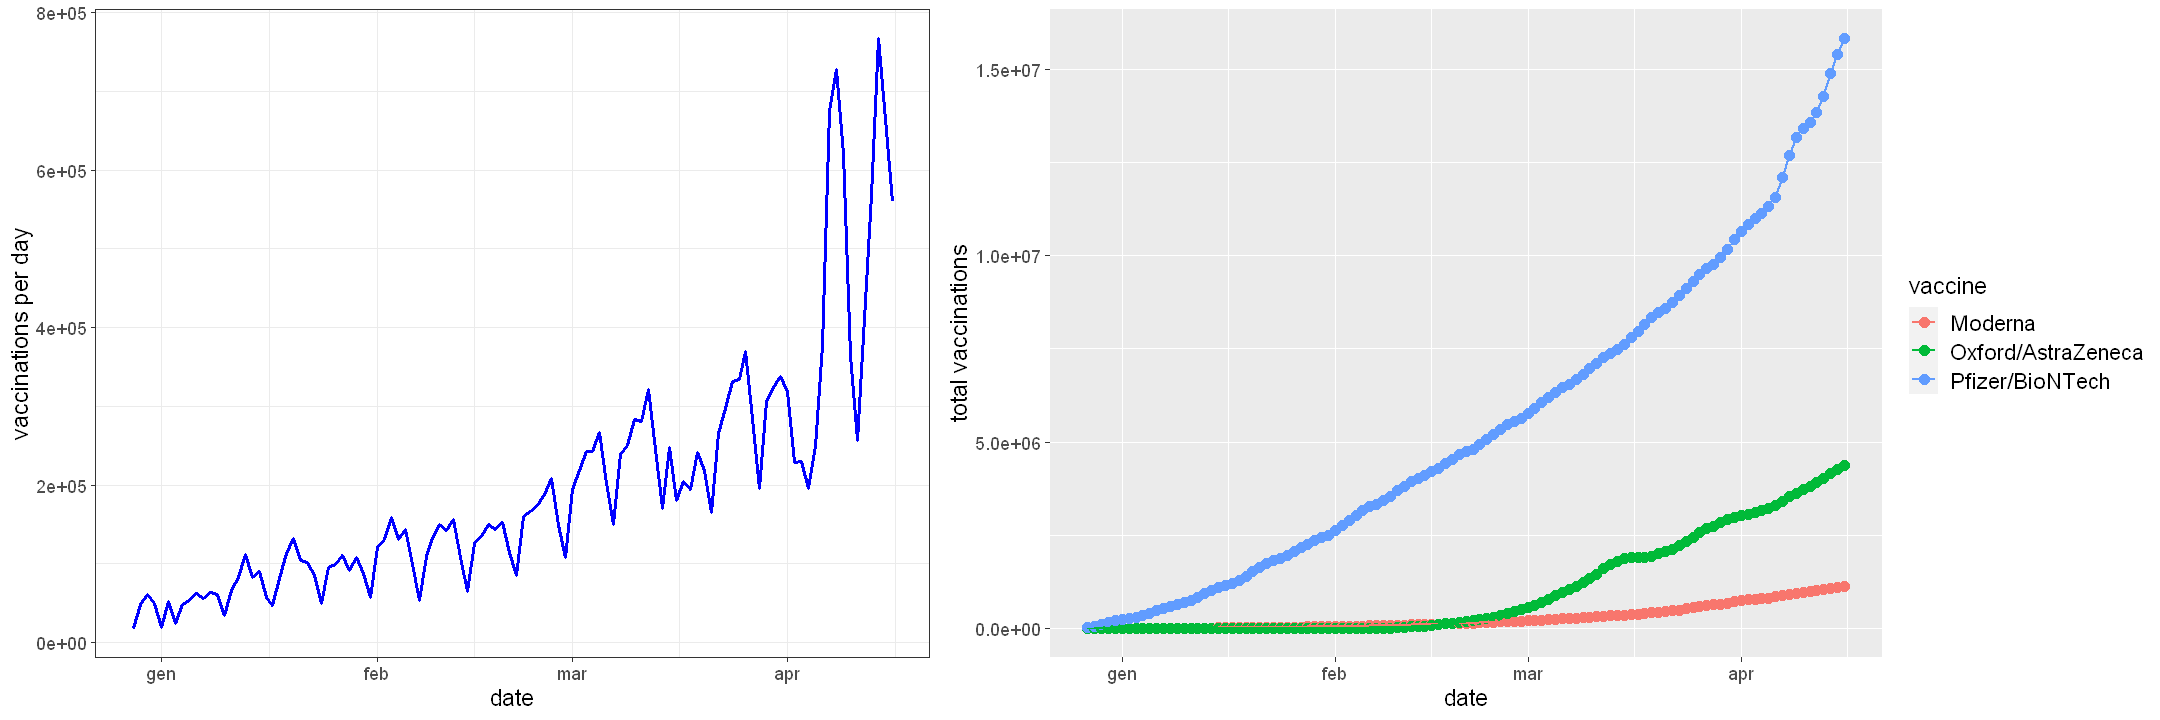

In [25]:
vaccine.ger <- vaccine.data %>% filter(location == 'Germany')

fig(18, 6)
p2 <- vaccine.ger %>% ggplot(aes(date, total_vaccinations, group = vaccine))
p2 <- p2 + geom_point(aes(col = vaccine), size = 2.7) + geom_line(aes(col =vaccine), size = 0.7) +
ylab('total vaccinations') +
theme_gray() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) +
theme(legend.title = element_text(size = 14), legend.text = element_text(size = 13))

p1 <- vaccine.ger %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations)) %>% 
mutate(vacc_per_day = c(total_vaccinations[1],diff(total_vaccinations))) %>% slice(2:n()) %>% ggplot(aes(date, vacc_per_day))
p1 <- p1 + geom_line(size = 0.9, col = 'blue') + ylab('vaccinations per day') +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) 

grid.arrange(p1, p2, nrow = 1, widths = c(1, 1.3))

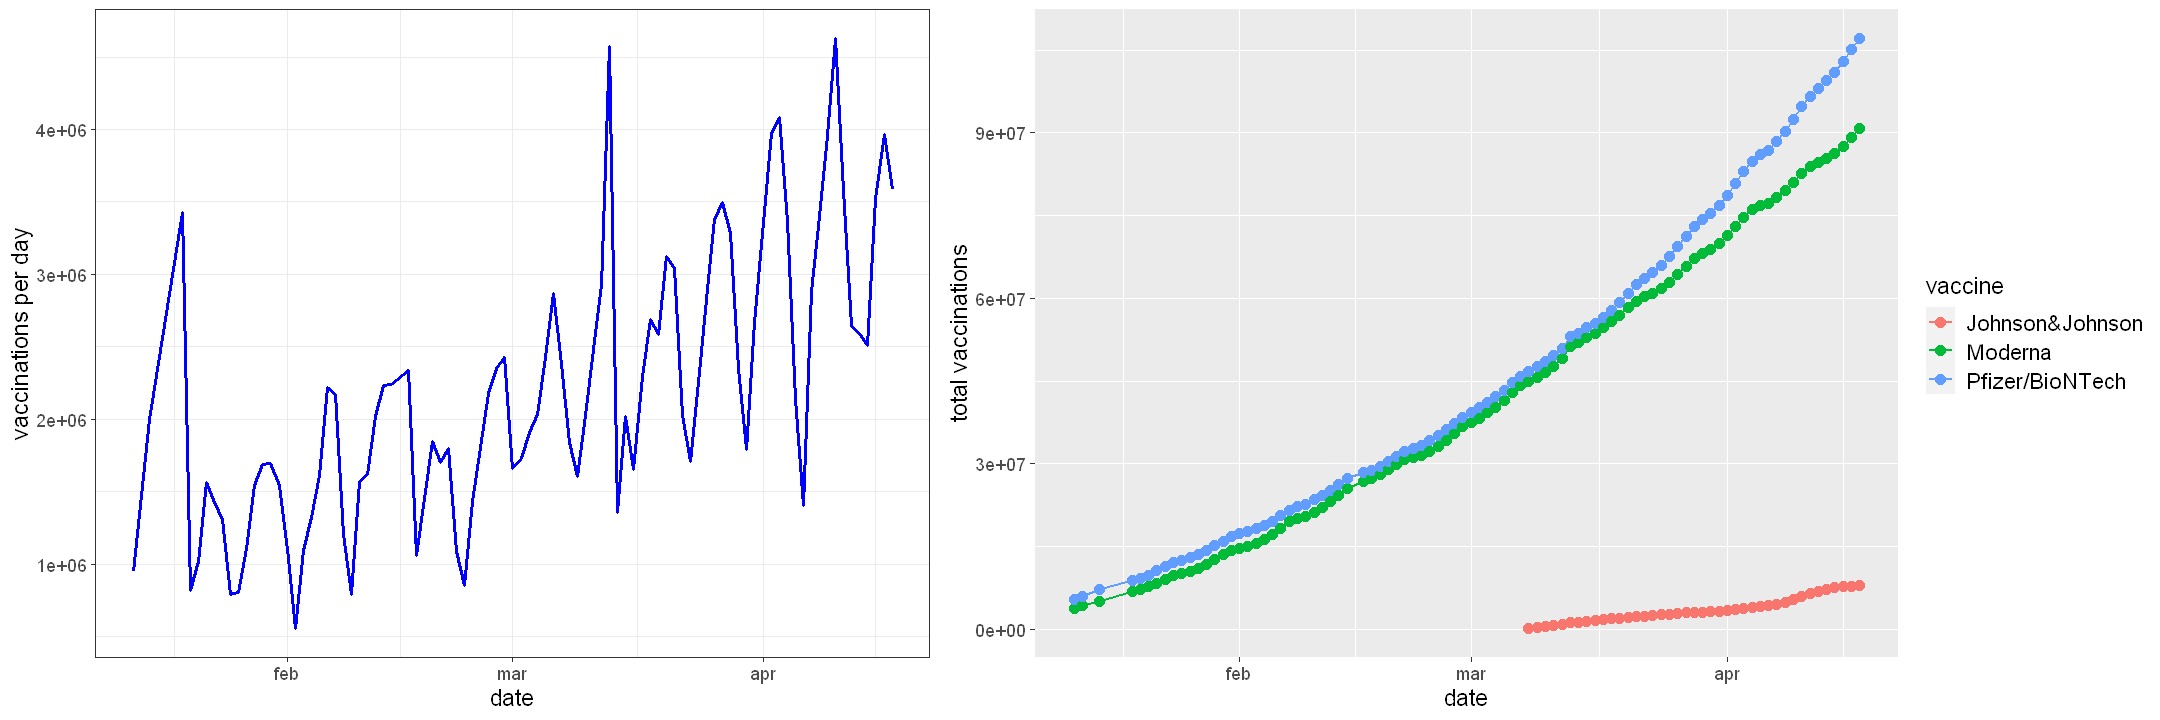

In [26]:
vaccine.usa <- vaccine.data %>% filter(location == 'United States')

fig(18, 6)
p2 <- vaccine.usa %>% ggplot(aes(date, total_vaccinations, group = vaccine))
p2 <- p2 + geom_point(aes(col = vaccine), size = 2.7) + geom_line(aes(col =vaccine), size = 0.7) +
ylab('total vaccinations') +
theme_gray() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) +
theme(legend.title = element_text(size = 14), legend.text = element_text(size = 13))

p1 <- vaccine.usa %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations)) %>% 
mutate(vacc_per_day = c(total_vaccinations[1],diff(total_vaccinations))) %>% slice(2:n()) %>% ggplot(aes(date, vacc_per_day))
p1 <- p1 + geom_line(size = 0.9, col = 'blue') + ylab('vaccinations per day') +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=11)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=11)) 

grid.arrange(p1, p2, nrow = 1, widths = c(1, 1.3))

Here an other dataframe is loaded

In [27]:
url <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/"
fname <- "vaccinations.csv"
target <- paste (url, fname , sep ="")
message("target:", target )
tmp_file <- tempfile("vaccinations.csv", "~/MasterCourse/Advance_Statistics/Ex_Lab/DATA/")
tmp <- curl::curl_download(target, destfile=tmp_file)
vaccine.data2 <- read_csv(tmp_file)
head(vaccine.data2, 6)

target:https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0,0,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,1367,NA,NA,NA,35


Now we want to plot the daily vaccination per million for the European Countries, notice that in this case NA are trated as 0. This can obvioulsy bring some errors.

In [28]:
europe_c = c("Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
            "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", 
            "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "Norway", "Belarus",
            "Moldova", "MOntenegro", "Serbia", "Albania", "Bosnia and Herzegovina", "North Macedonia")

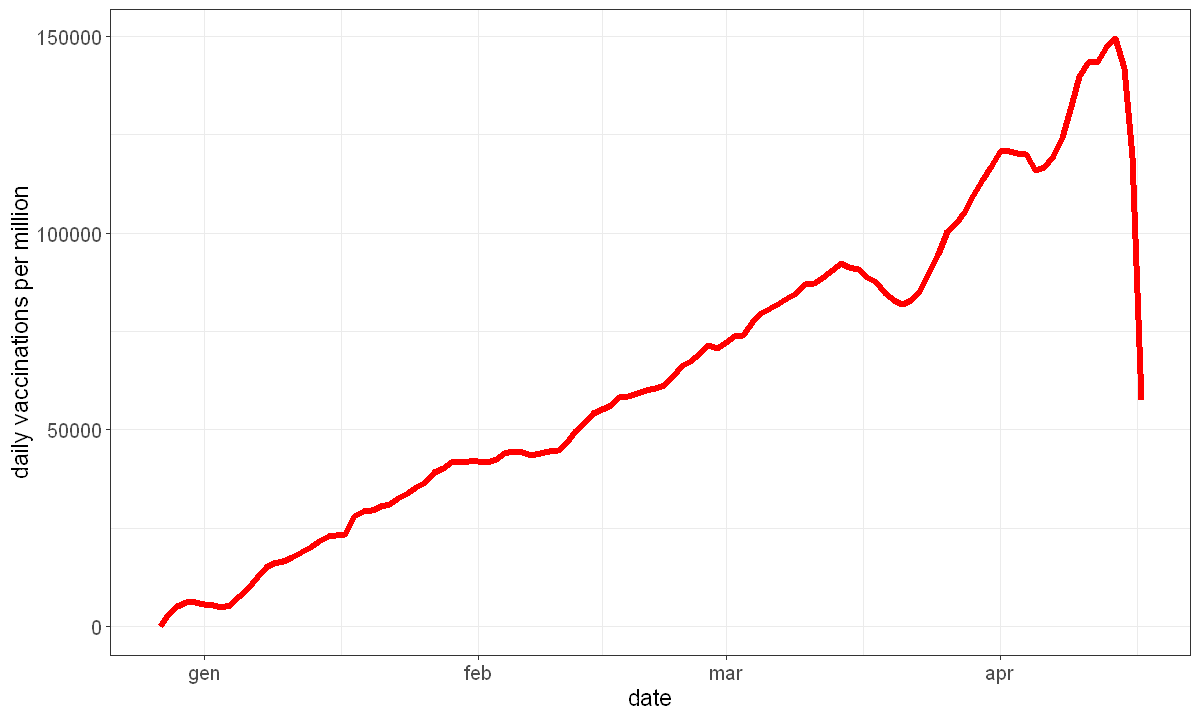

In [29]:
fig(10, 6)
p <-vaccine.data2 %>% filter(location %in% europe_c) %>%  group_by(date) %>% 
summarise(daily_vaccinations_per_million = sum(daily_vaccinations_per_million, na.rm = TRUE))%>% 
ggplot(aes(date, daily_vaccinations_per_million))
p + geom_line(col = 'red', size = 1.7, linetype = 1) + ylab('daily vaccinations per million') +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) 

Let us see some details of this datastructure.

* Comparison on daily vaccine among Italy and bordering countries

Warning message:
"Removed 5 row(s) containing missing values (geom_path)."


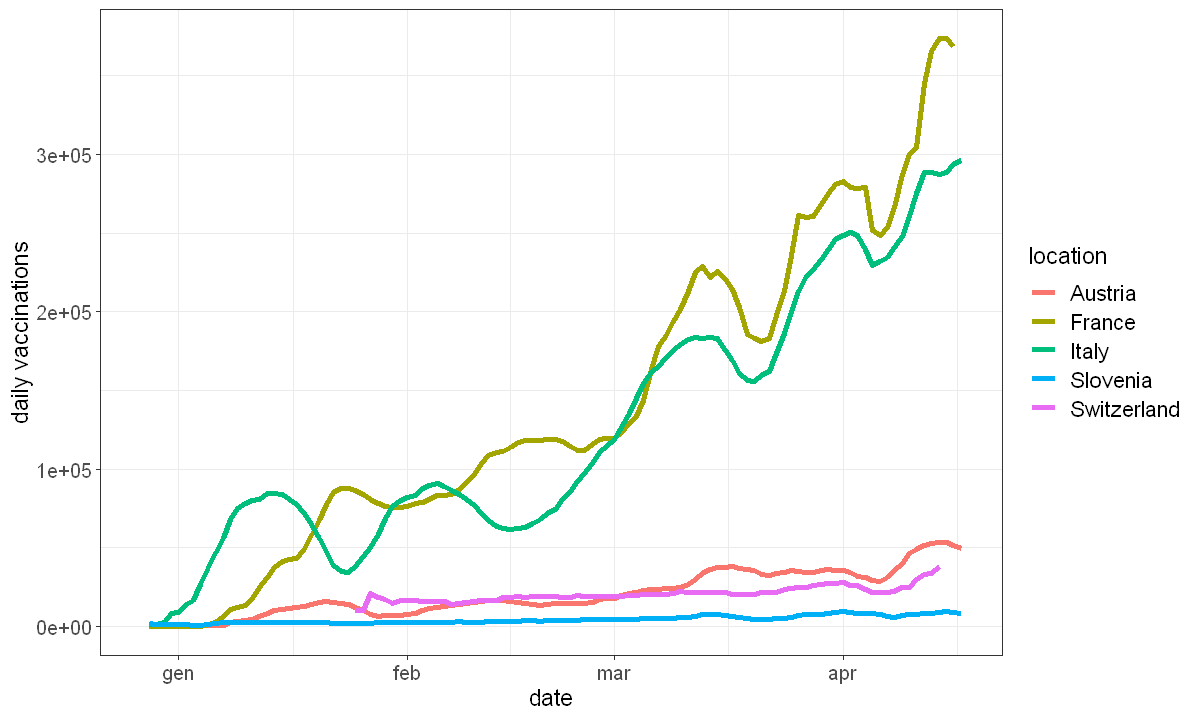

In [30]:
fig(10, 6)
p1 <- vaccine.data2 %>% filter(location %in% c("Austria", "Italy", "Switzerland", "France", "Slovenia")) %>% 
ggplot(aes(date, daily_vaccinations, group = location))
p1 + geom_line(aes(col = location), size = 1.5) + ylab('daily vaccinations') +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
theme(legend.title = element_text(size = 14), legend.text = element_text(size = 13)) 

* Comparison on people vaccinated among Europe, Asia and Africa

Warning message:
"Removed 57 row(s) containing missing values (geom_path)."


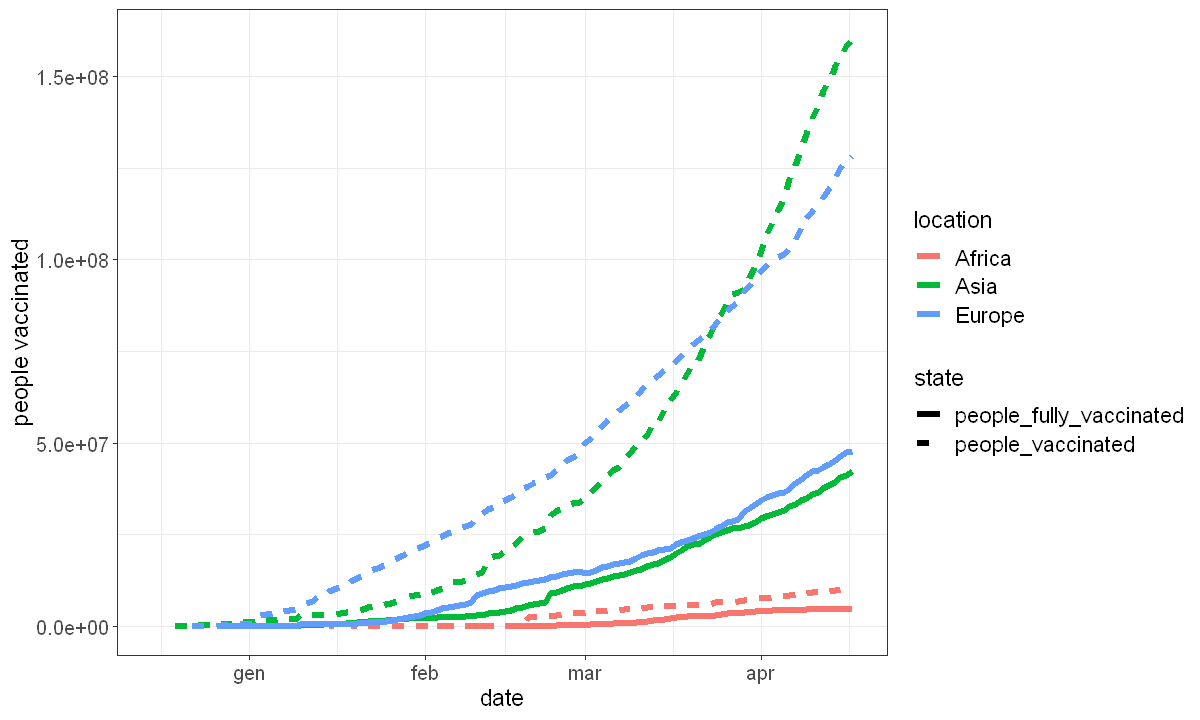

In [31]:
fig(10, 6)
p1 <- vaccine.data2 %>% filter(location %in% c("Europe", "Asia", "Africa")) %>% select(date, location, people_vaccinated, people_fully_vaccinated) %>% 
pivot_longer(cols = !c(date, location), names_to = 'state', values_to = 'Nvacc') %>%
ggplot(aes(date, Nvacc, col = location, linetype = state))
p1 + geom_line(aes(col = location), size = 1.7) +
ylab('people vaccinated') +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
theme(legend.title = element_text(size = 14), legend.text = element_text(size = 13))

* Comparison on people vaccinated per hundred between Italy and UK

Warning message:
"Removed 21 row(s) containing missing values (geom_path)."


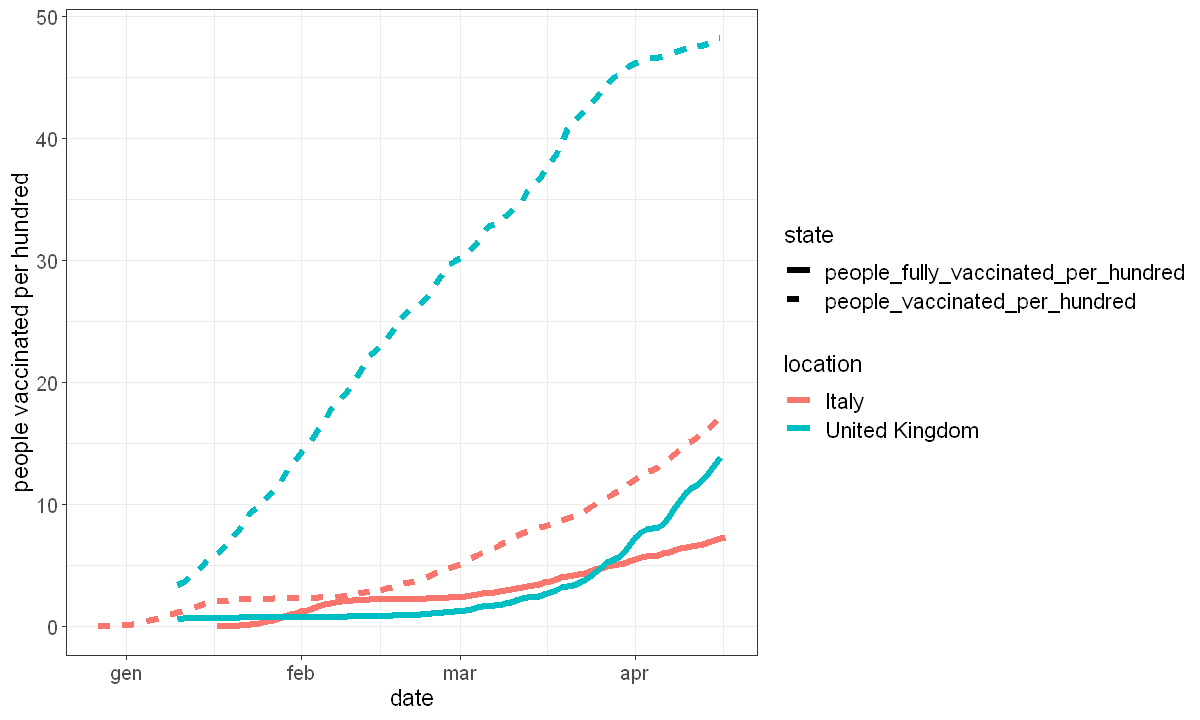

In [32]:
fig(10, 6)
p1 <- vaccine.data2 %>% filter(location %in% c("Italy", "United Kingdom")) %>% select(date, location, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred) %>% 
pivot_longer(cols = !c(date, location), names_to = 'state', values_to = 'Nvacc') %>%
ggplot(aes(date, Nvacc, col = location, linetype = state))
p1 + geom_line(aes(col = location), size = 1.7) +
ylab('people vaccinated per hundred') +
theme_bw() +
theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
theme(legend.title = element_text(size = 14), legend.text = element_text(size = 13))